<a href="https://colab.research.google.com/github/alex-punchenko/my_work/blob/main/AnalysisTS_%2B_Reduction_stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных и импорт библиотек

In [1]:
!wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip'
!unzip '/content/1._Лекция_tsml.zip'
!rm '/content/1._Лекция_tsml.zip'

--2025-03-18 14:15:16--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769056 (751K) [application/x-zip-compressed]
Saving to: ‘1._Лекция_tsml.zip’

1._Лекция_tsml.zip  100%[===================>] 751.03K  1.01MB/s    in 0.7s    

2025-03-18 14:15:18 (1.01 MB/s) - ‘1._Лекция_tsml.zip’ saved [769056/769056]

Archive:  /content/1._Лекция_tsml.zip
  inflating: international-airline-passengers.csv  
  inflating: monthly-car-sales-in-quebec-1960.csv  
  inflating: monthly-sales-of-company-x-jan-6.csv  
   creating: Series/
  inflating: Series/daily-total-female-births-in-cal.csv  
  inflating: Series/international-airline-passengers.csv  
  inflating: Series/mean-monthly-air-temperature-deg.csv  
  inflating: Serie

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

# Функции отображения информации о временном ряде

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# Оценка и приведение к стационарности TS

## TS 1

In [6]:
df1 = pd.read_csv('/content/Series/monthly-sales-of-company-x-jan-6.csv')['Count']

**Ряд имеет возрастающий тренд, сезонность.
По результатам теста и визуально ряд не стационарен.**

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


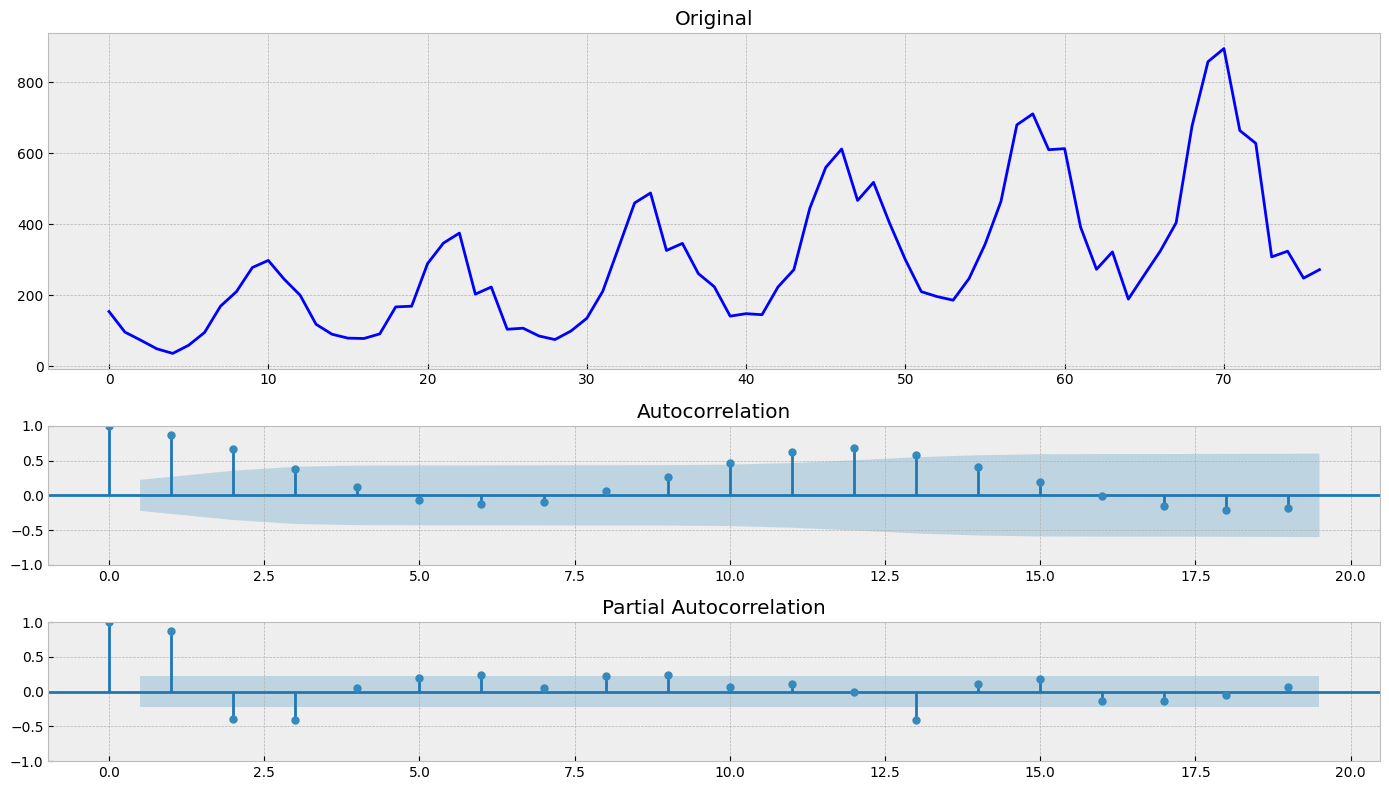

In [7]:
tsplot(df1)

Уменьшение дисперсии

In [8]:
df1 = boxcox(df1, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


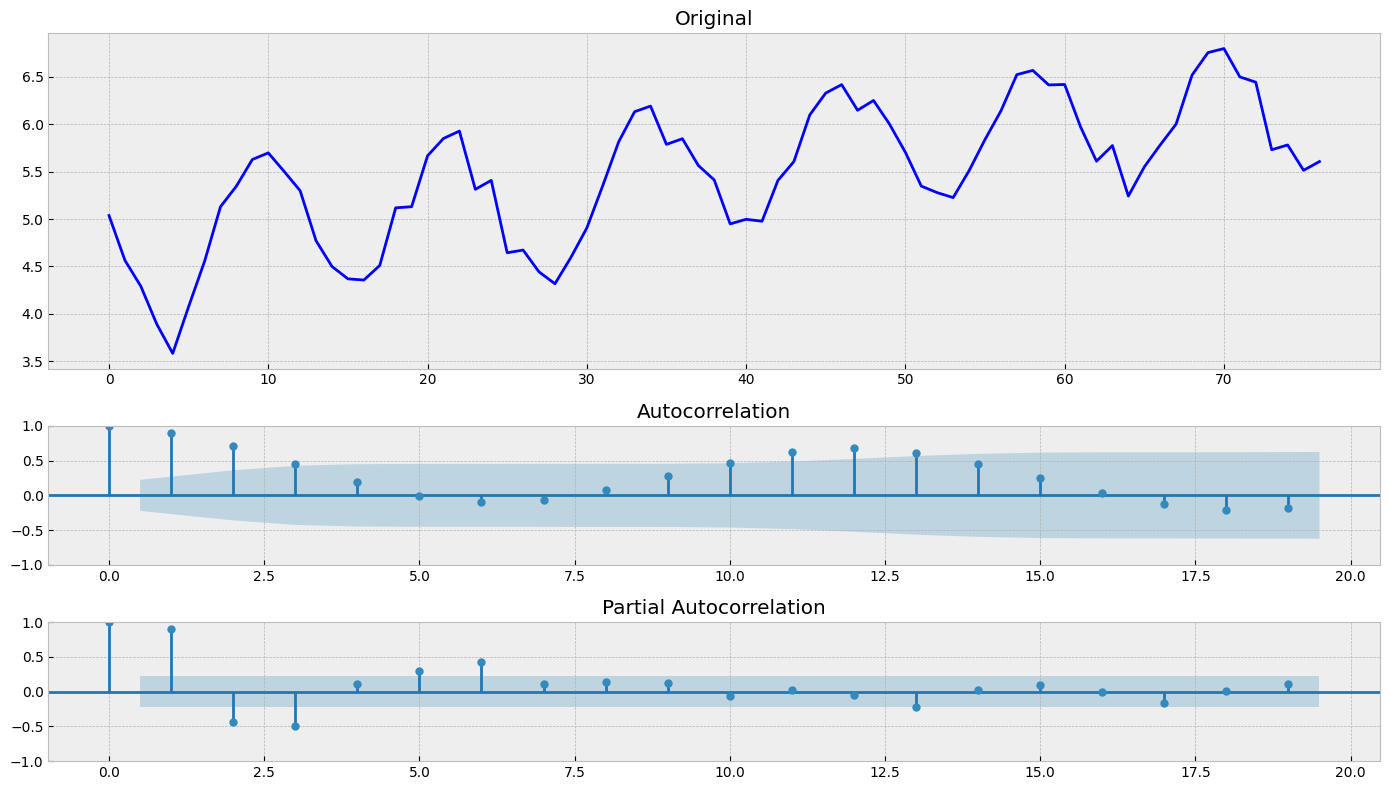

In [9]:
tsplot(df1)

Сглаживание dif

In [10]:
df1 = df1[1:] - df1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


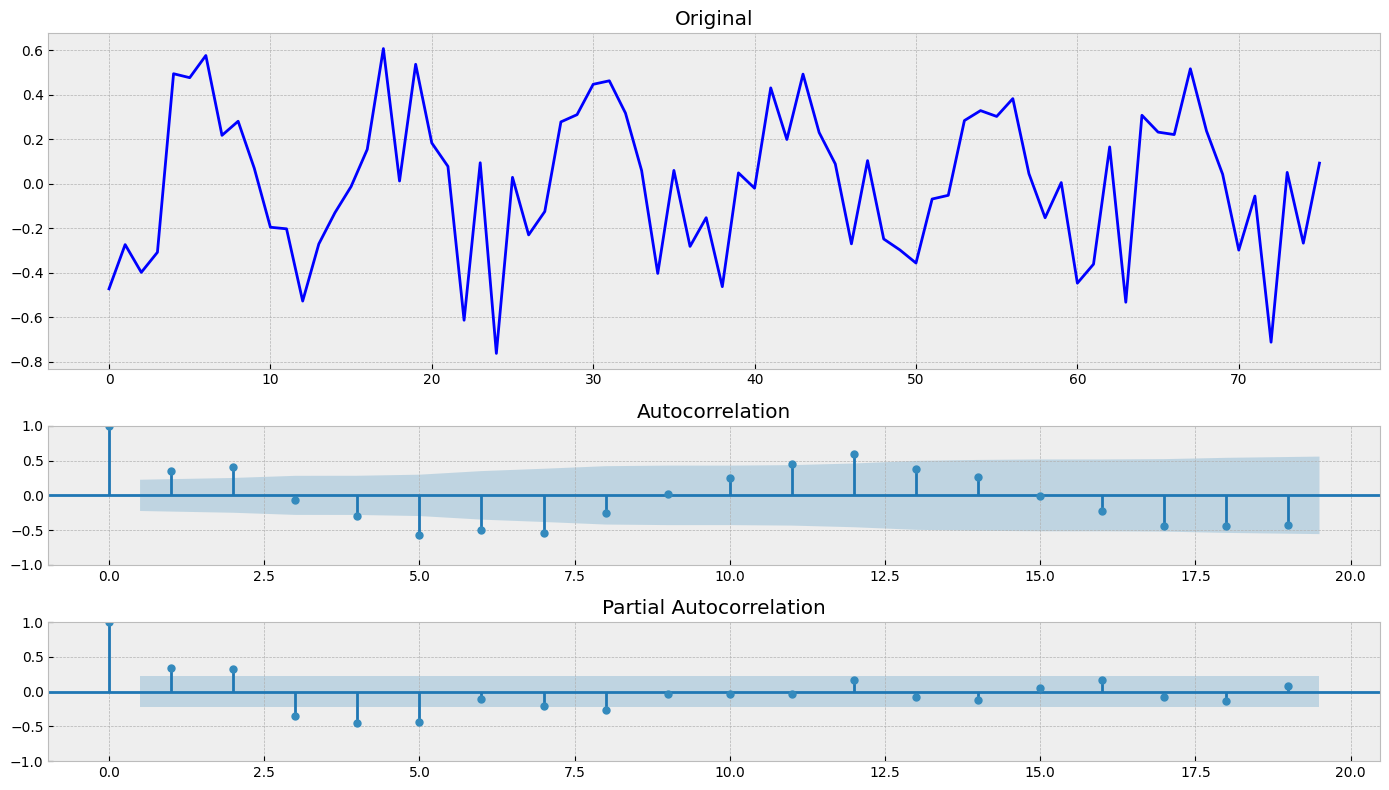

In [11]:
tsplot(df1)

Сохранилась сезонность

In [12]:
df1 = df1[12:] - df1[:-12]

In [69]:
df1 = df1[11:] - df1[:-11]

Results of Dickey-Fuller Test:
Test Statistic                -1.134684e+01
p-value                        1.022135e-20
#Lags Used                     0.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


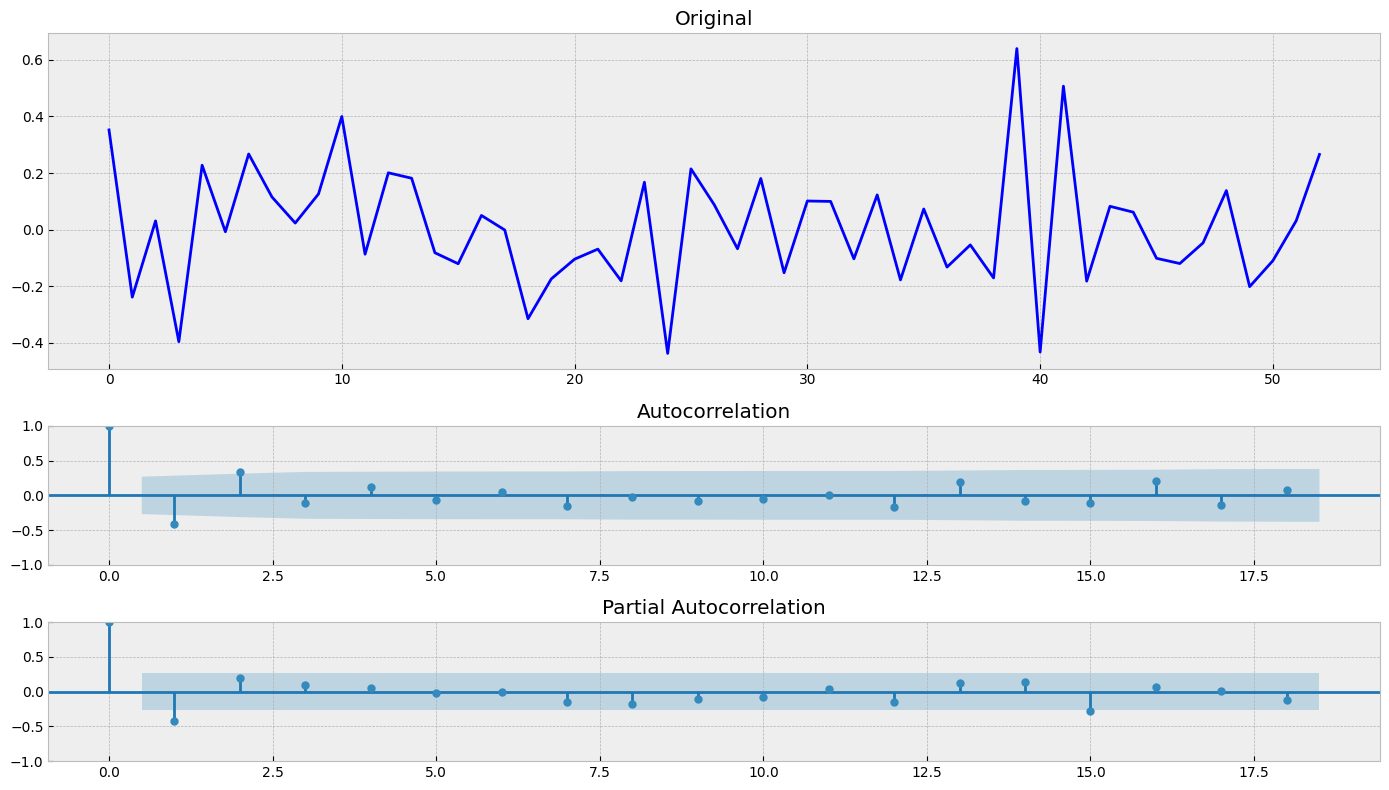

In [70]:
tsplot(df1)

## TS 2

In [14]:
df2 = pd.read_csv('/content/Series/international-airline-passengers.csv')['Count']

Сезонность, восходящий тренд, большая дисперсия

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


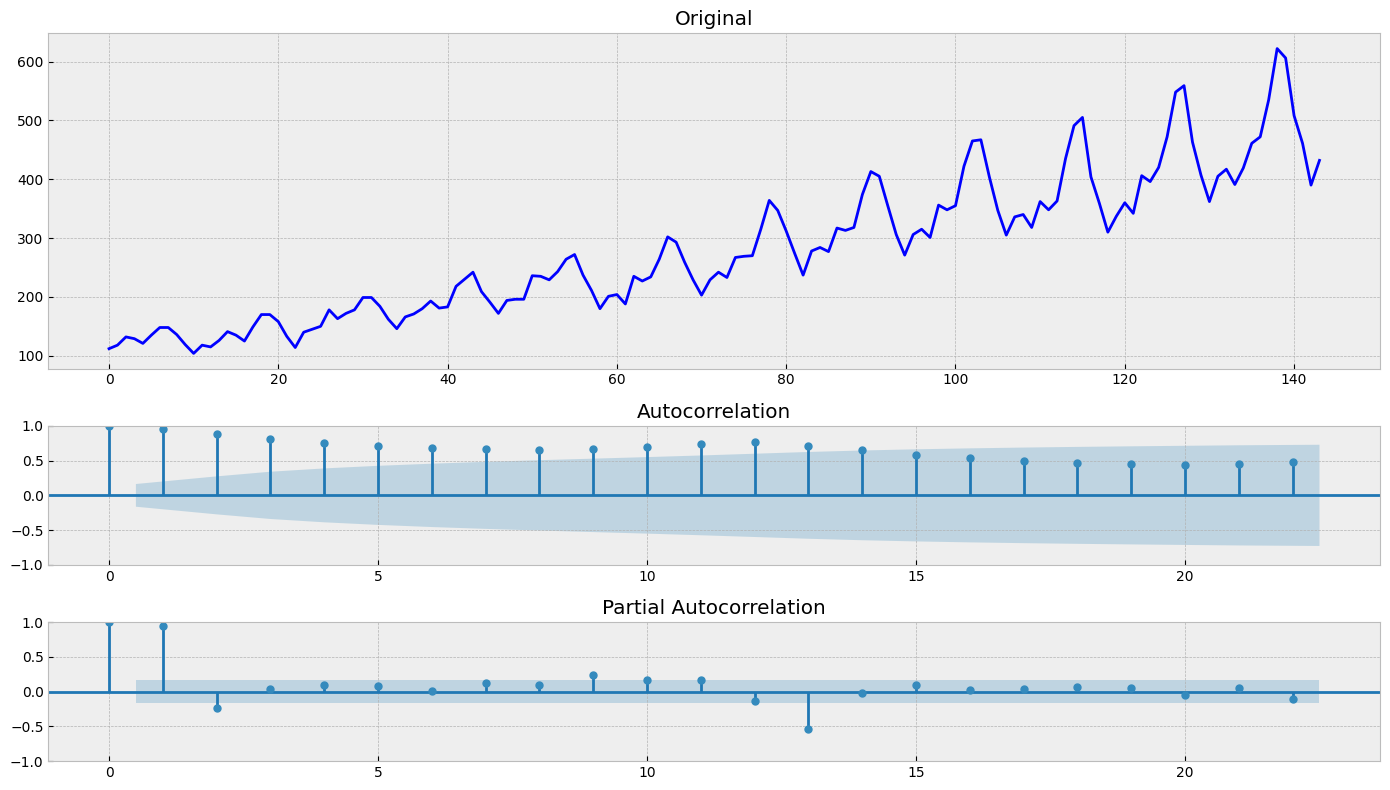

In [15]:
tsplot(df2)

In [16]:
df2 = boxcox(df2, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


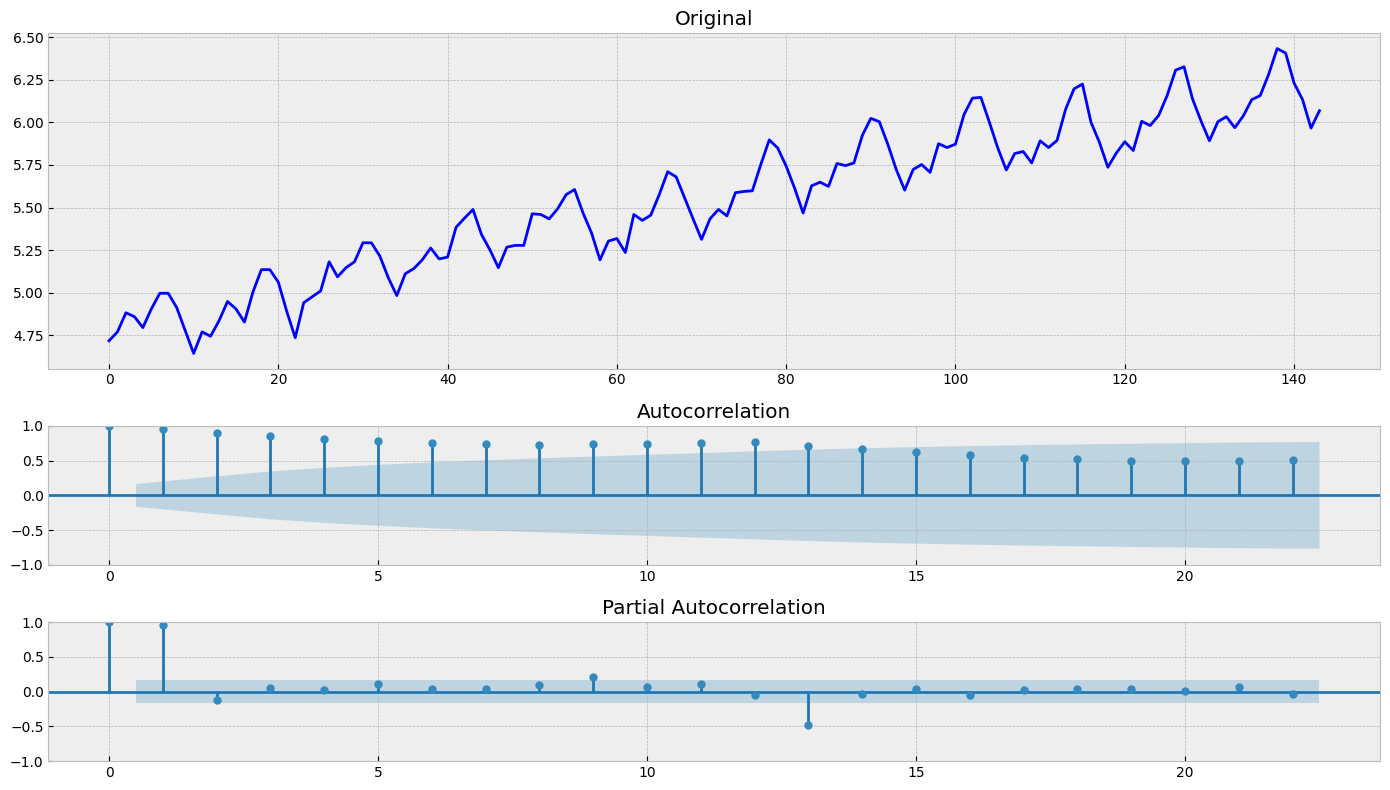

In [17]:
tsplot(df2)

In [18]:
df2 = df2[1:] - df2[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


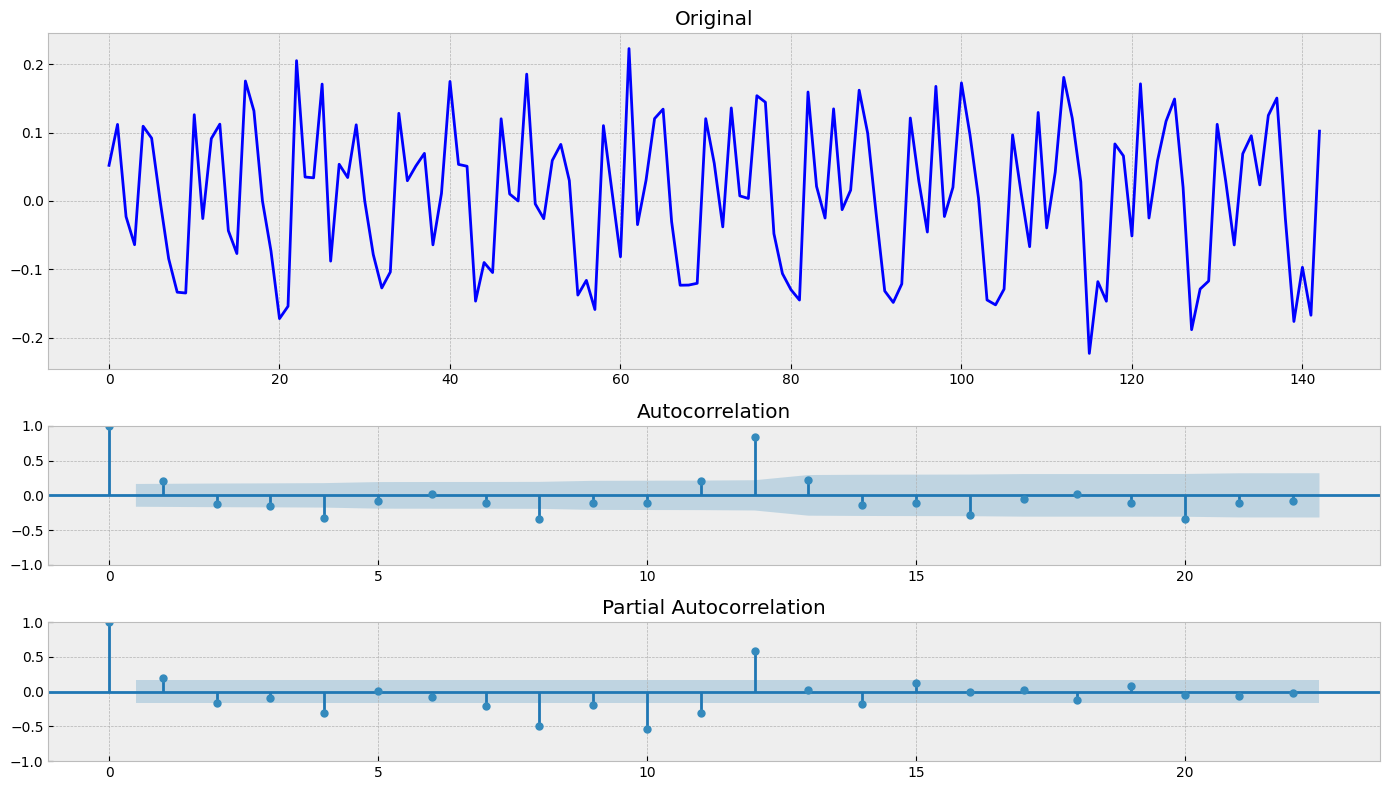

In [19]:
tsplot(df2)

In [20]:
df2 = df2[12:] - df2[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


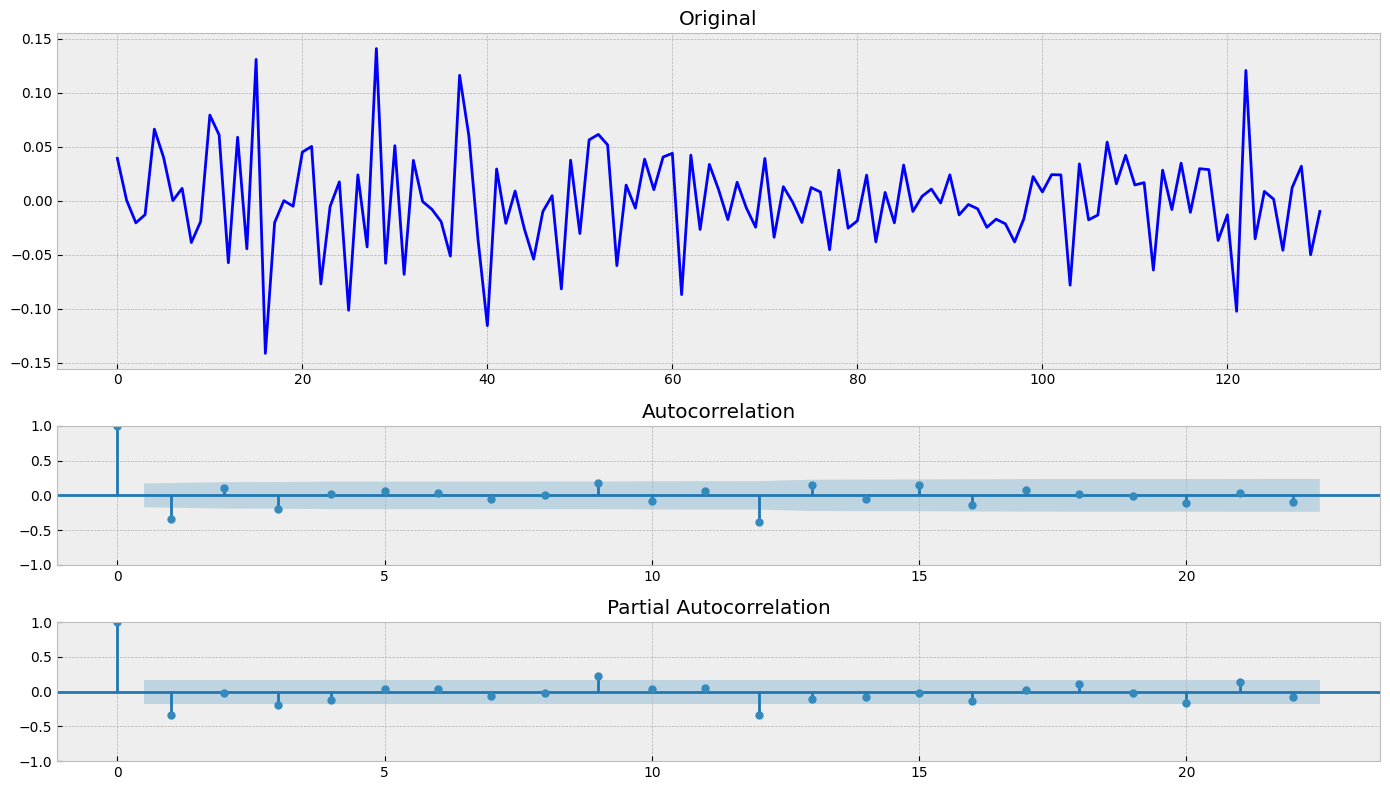

In [21]:
tsplot(df2)

## TS 3

In [22]:
df3 = pd.read_csv('/content/Series/mean-monthly-air-temperature-deg.csv')['Deg']

Стационарный ряд

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


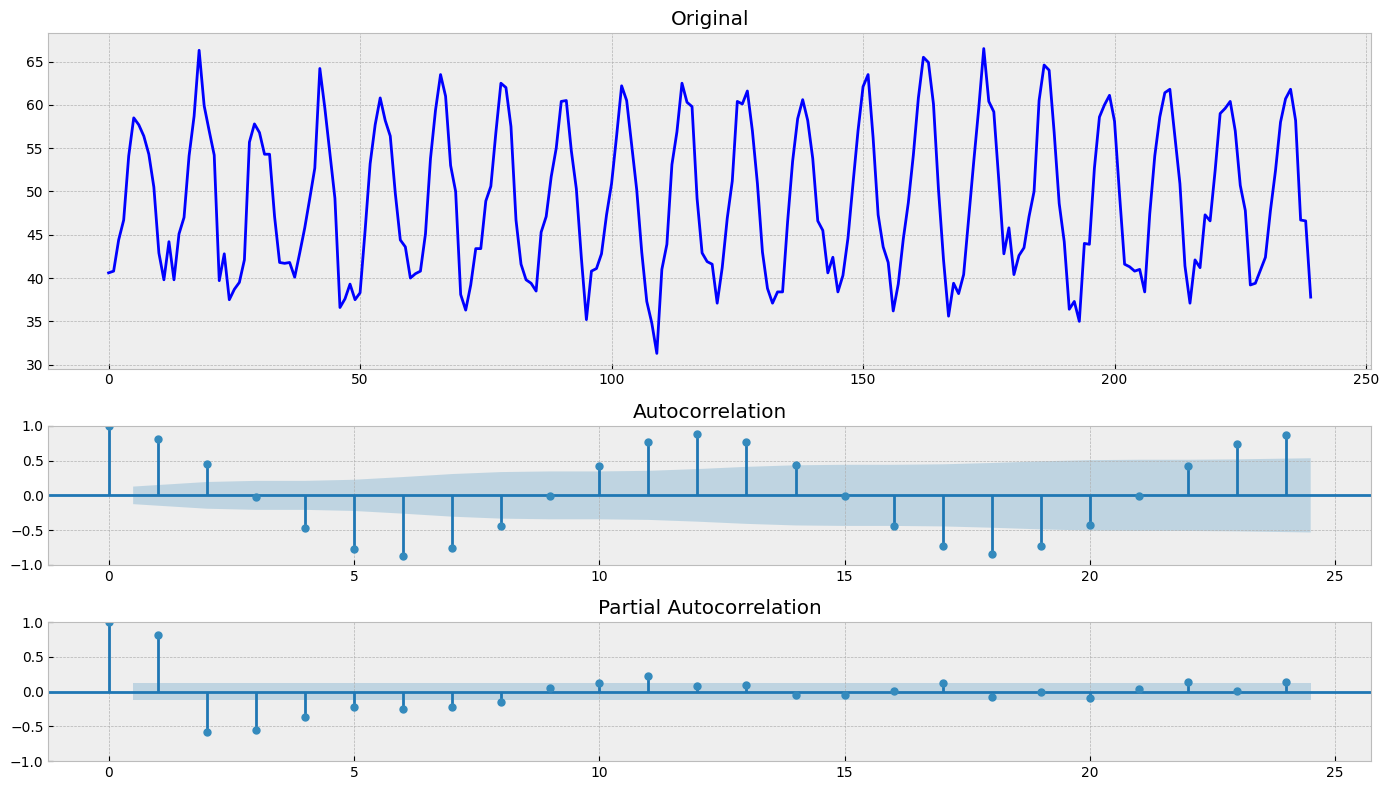

In [24]:
tsplot(df3)

## TS 4

In [25]:
df4 =  pd.read_csv('/content/Series/monthly-boston-armed-robberies-j.csv')['Count']

Восходящий тренд, большая дисперсия

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


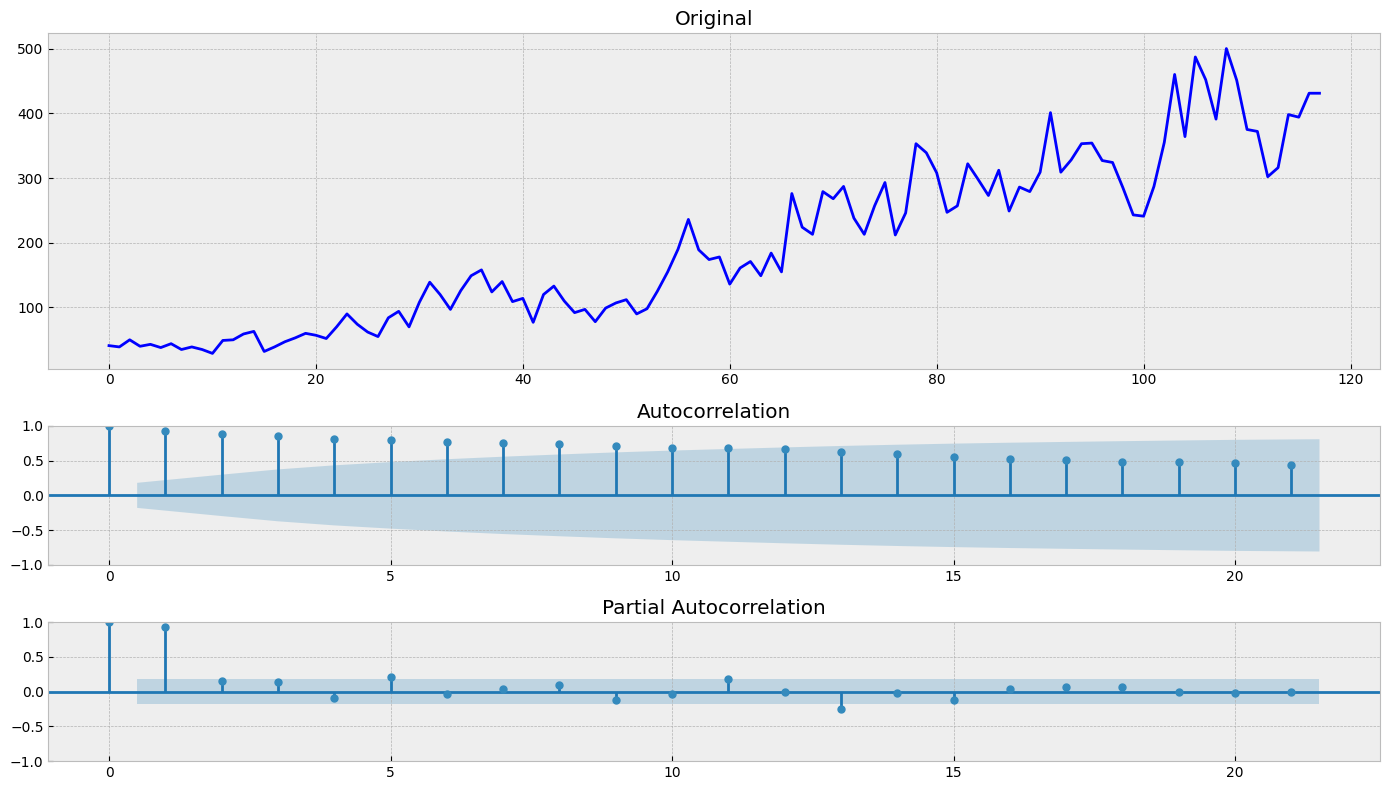

In [26]:
tsplot(df4)

In [27]:
df4 = boxcox(df4, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


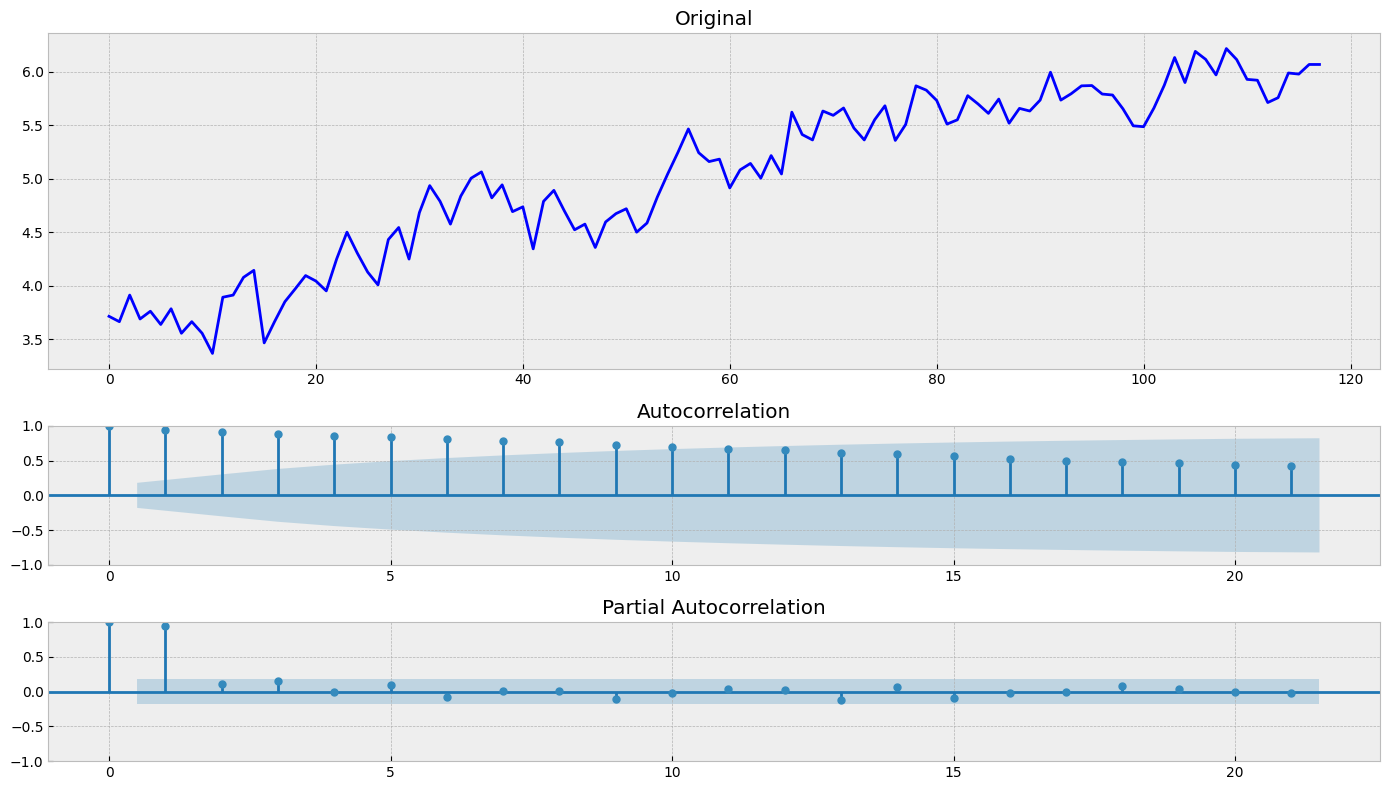

In [28]:
tsplot(df4)

In [29]:
df4 = df4[1:] - df4[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


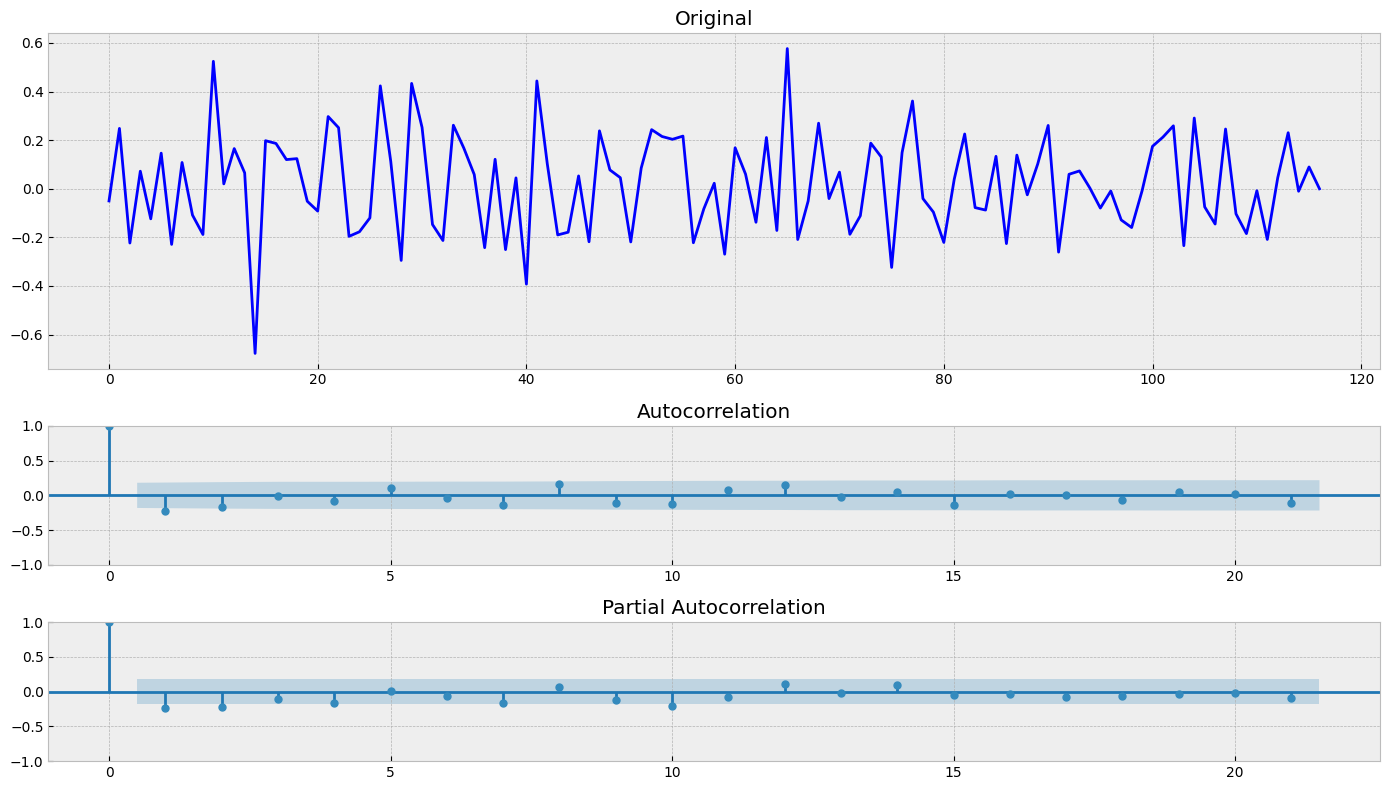

In [30]:
tsplot(df4)

## TS 5

In [54]:
df5 = pd.read_csv('/content/Series/monthly-sales-of-company-x-jan-6.csv')['Count']

Сезоность, тренд

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


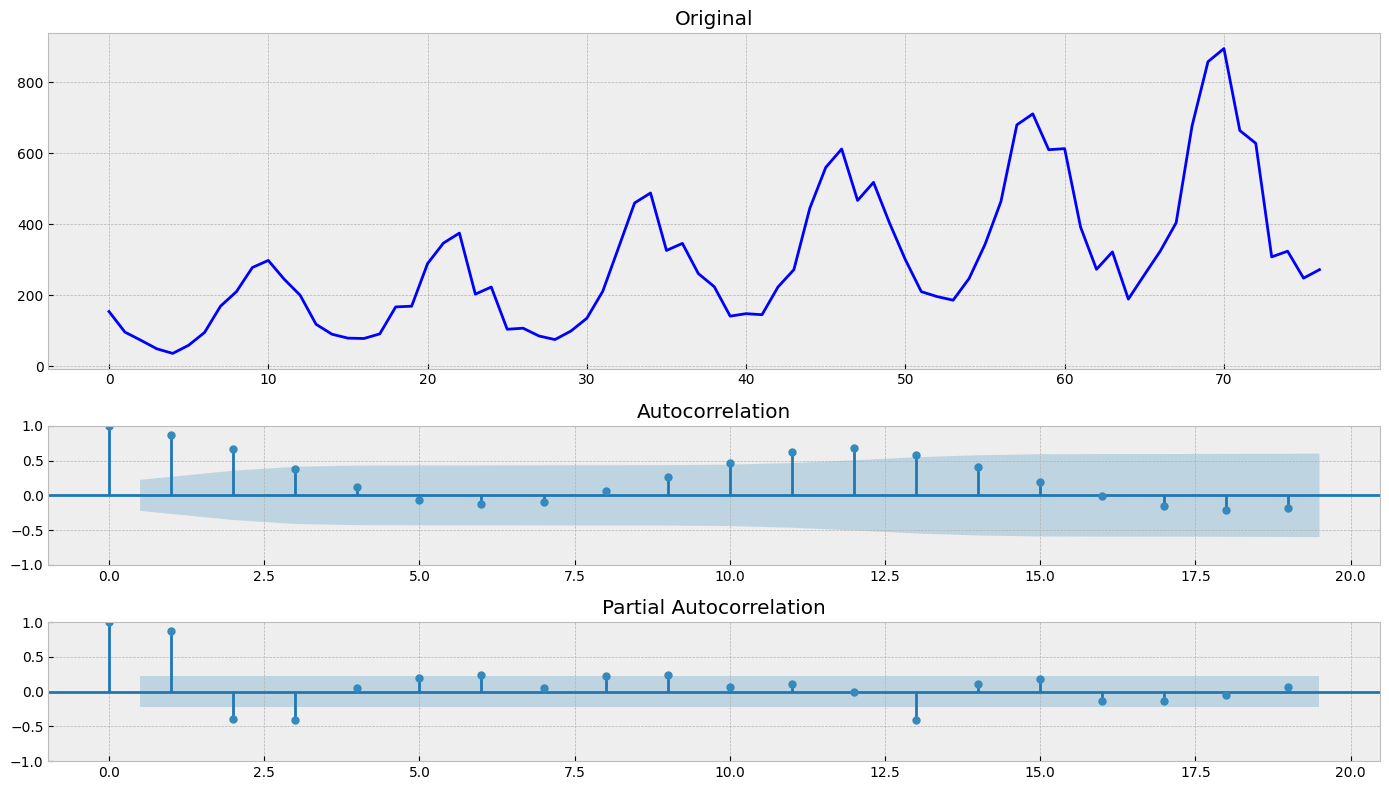

In [55]:
tsplot(df5)

In [56]:
df5 = boxcox(df5, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


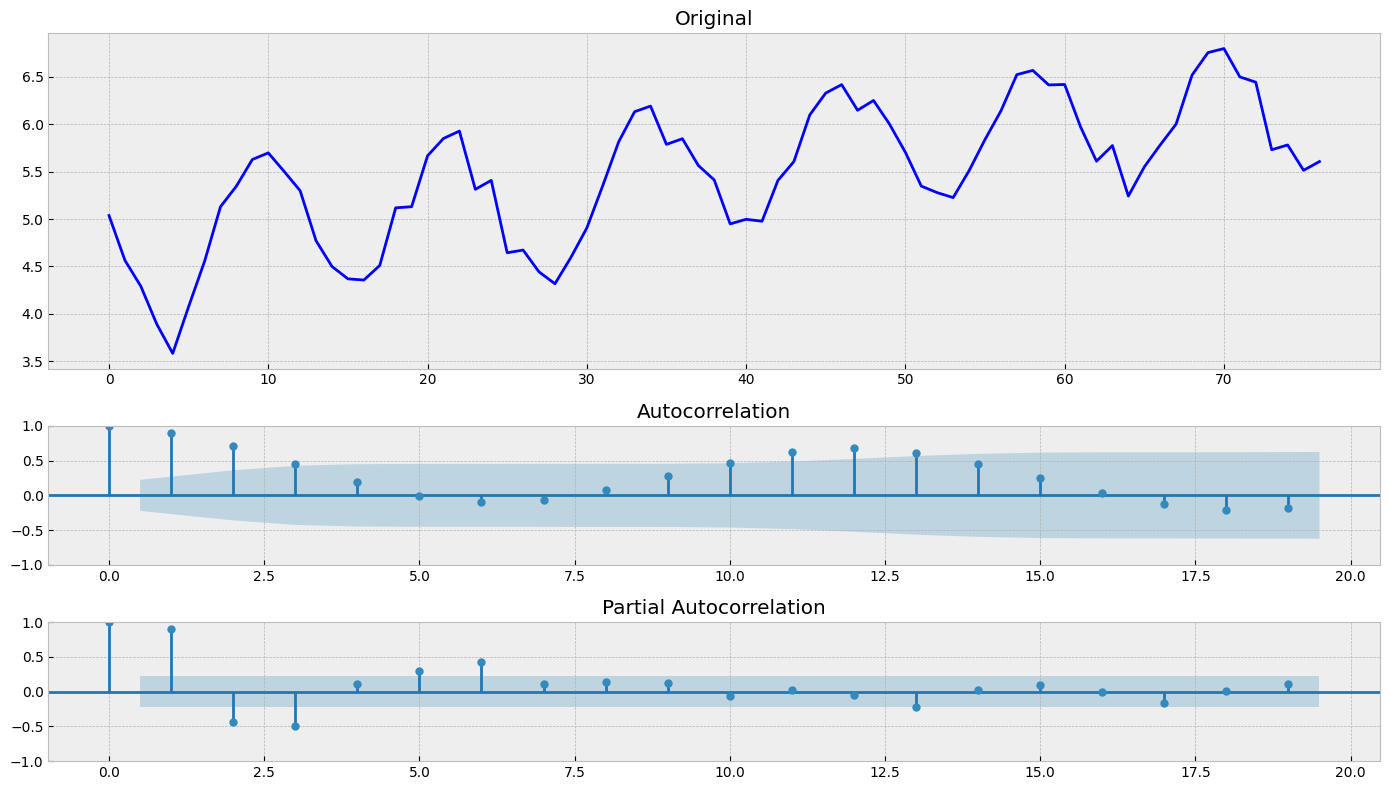

In [57]:
tsplot(df5)

In [58]:
df5 = df5[1:] - df5[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


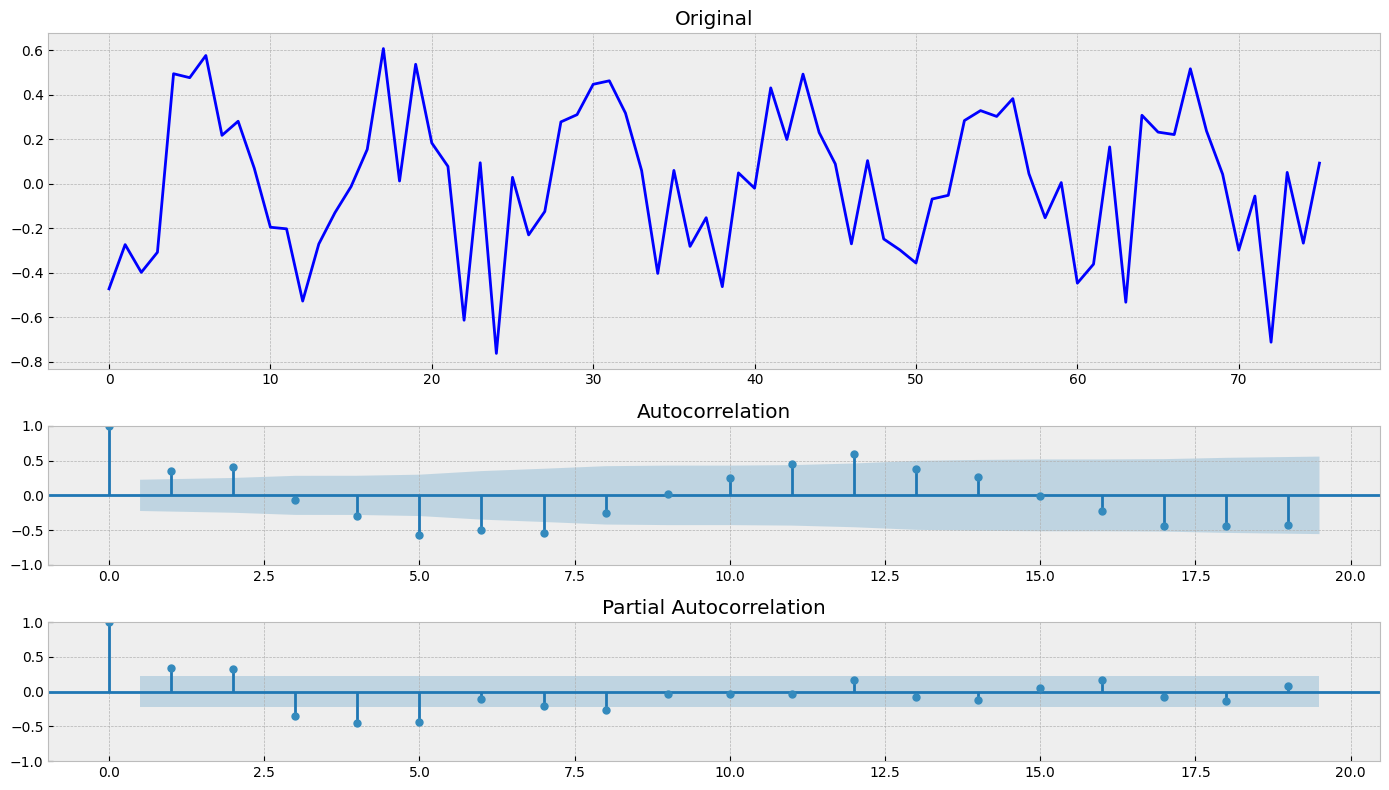

In [59]:
tsplot(df5)

In [60]:
df5 = df5[11:] - df5[:-11]

Results of Dickey-Fuller Test:
Test Statistic                 -2.346665
p-value                         0.157359
#Lags Used                     11.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


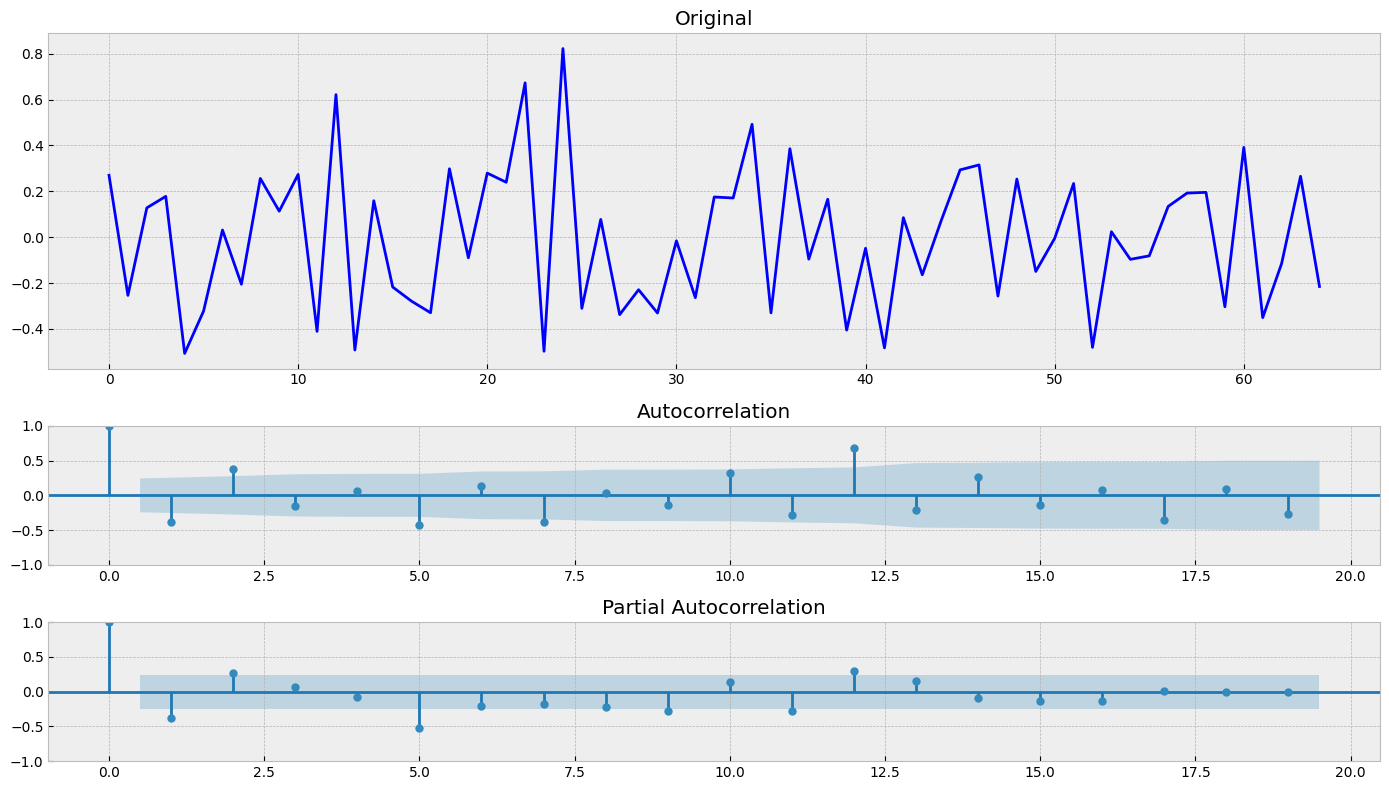

In [61]:
tsplot(df5)

In [62]:
df5 = df5[12:] - df5[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -1.134684e+01
p-value                        1.022135e-20
#Lags Used                     0.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


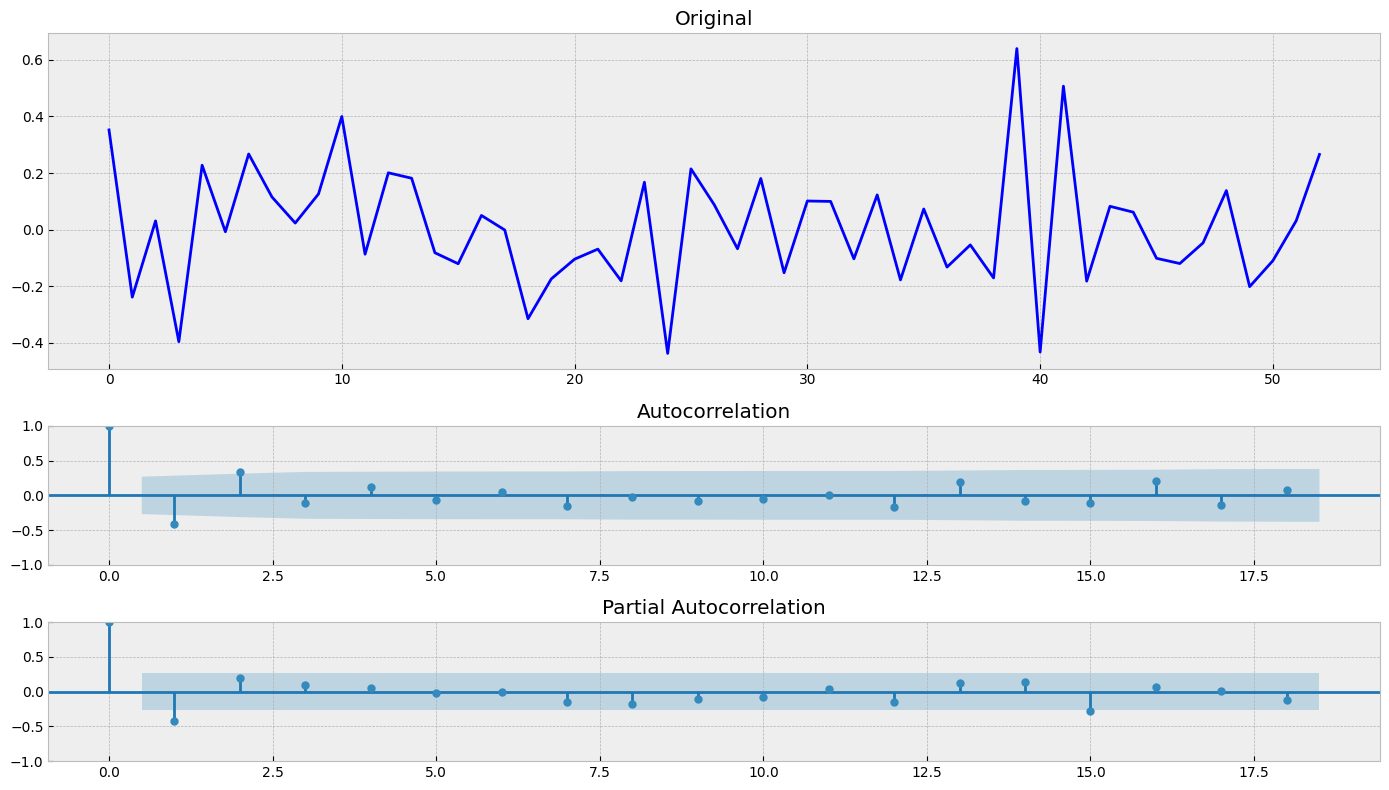

In [63]:
tsplot(df5)

## TS 6

In [64]:
df6 = pd.read_csv('/content/Series/weekly-closings-of-the-dowjones-.csv')['Close']

Восходящий тренд до середины ряда с последующим снижением, небольшое увеличение дисперсии

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


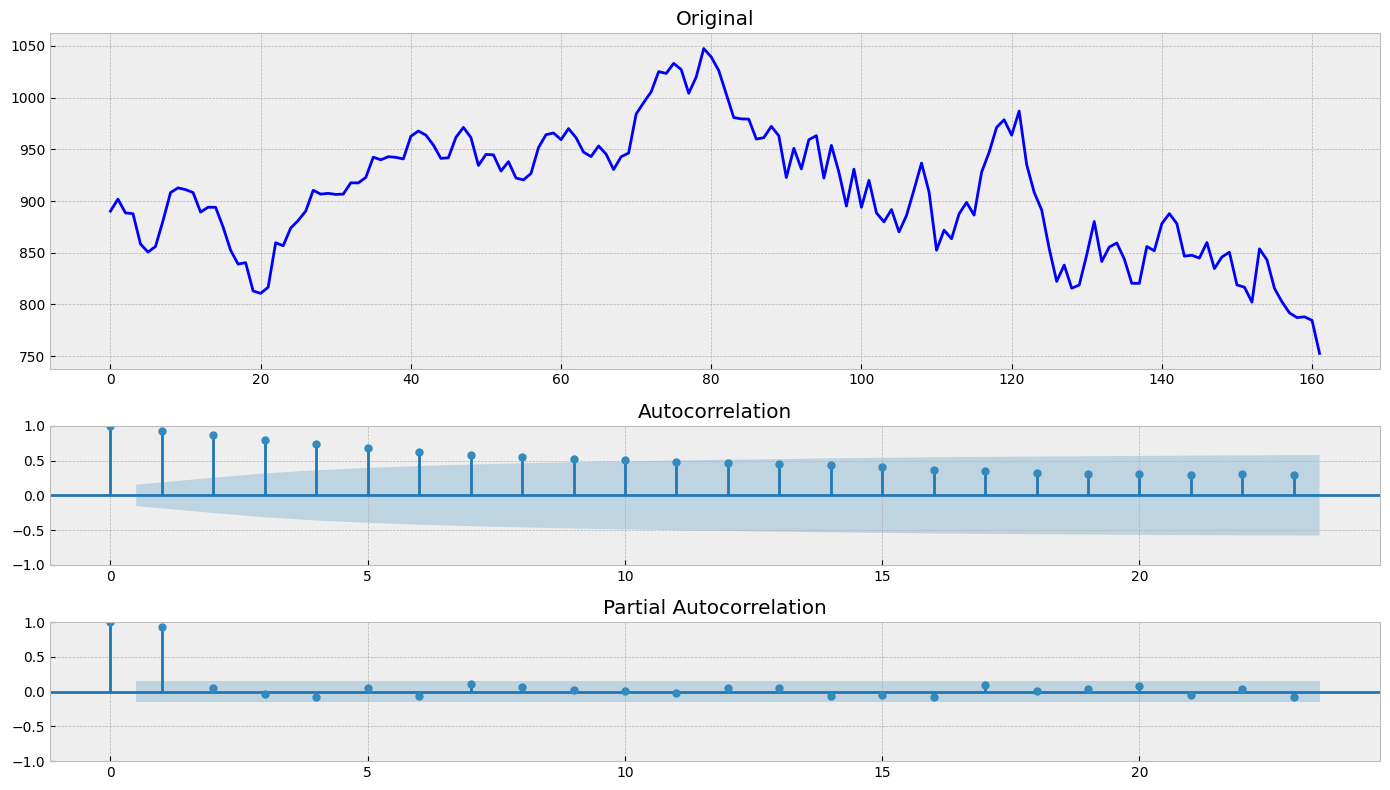

In [65]:
tsplot(df6)

In [66]:
df6 = boxcox(df6, 0)

In [67]:
df6 = df6[1:] - df6[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


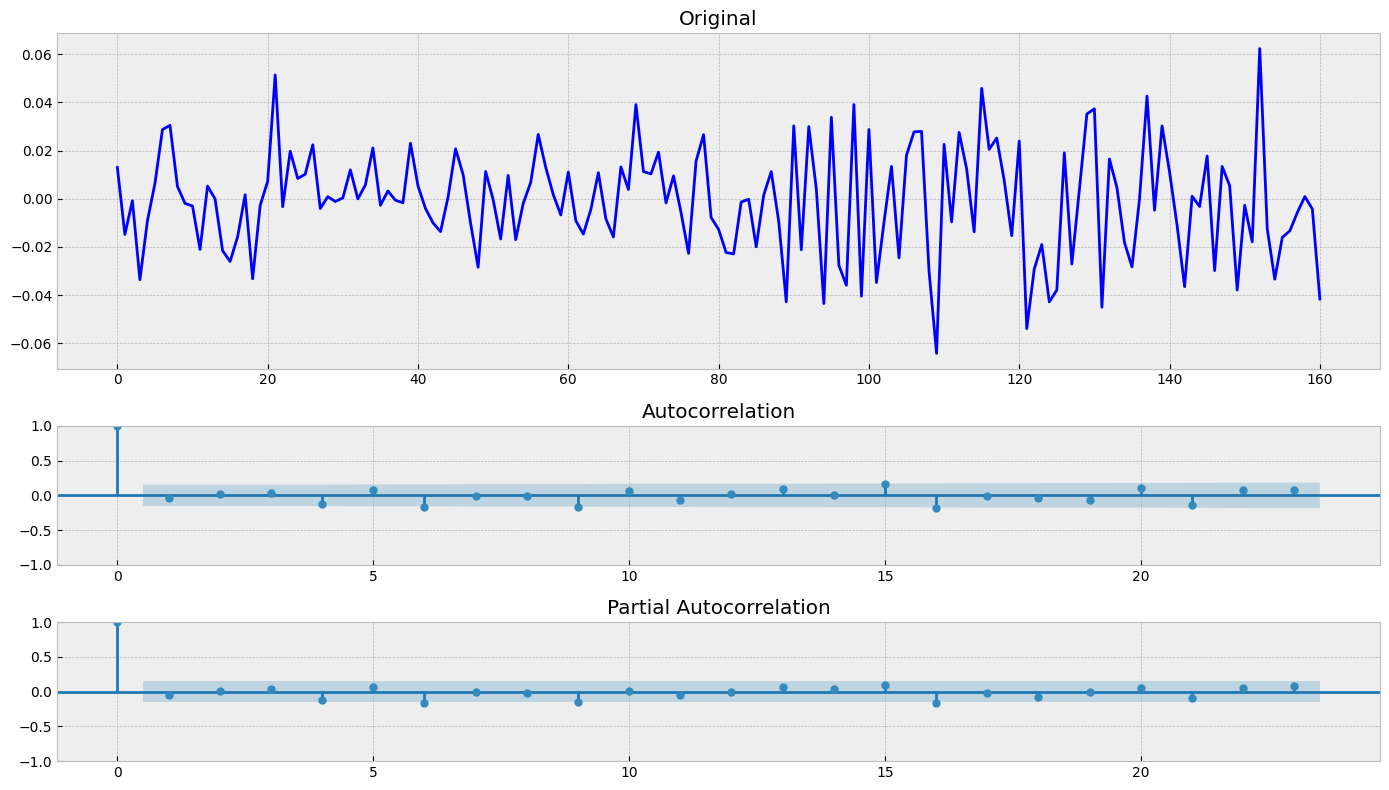

In [68]:
tsplot(df6)